In [2]:
import numpy as np
import matplotlib.pyplot as plt


### define the prior over the parameters
the prior can be put into the return line. I think our parameter space is 3 dimensional, so I used 3 parameters but that can be easily changed.
If mode=Normal or mode=Uniform gives normal/uniform priors. mode=None allows us to set different arbitrary functions for each prior. prior_1, prior_2, prior_3, prior_4 is what we have to edit to fit the new task (hopefully the priors dont actually depend on where we are in parameter space).


In [35]:
def prior(params, mode=None):
    if mode == 'normal' :
        return np.prod(np.exp(-(params**2)))
    if mode == 'uniform' :
        return 1
    else :
        p1, p2, p3, p4 = params
        prior_1 = p1/np.sum(params)
        prior_2 = p1/np.sum(params)
        prior_3 = p1/np.sum(params)
        priot_4 = p1/np.sum(params)
        return [prior_1*prior_2*prior_3*prior_4]


### define the likelihood given a set of parameters and a data set
pretty straightforward, we calculate the marginal probabilities of each data point and then take the product to find the joint probability(probability of the whole data set). marginal_probs is the part we will have to edit to fit our new task.

Here we are just using p1 is the estimate of e and p3 is the estimate of the offset (assuming guassian signal)

In [31]:
def likelihood(params, data):
    p1, p2, p3, p4 = params
    marginal_probs=np.sqrt(np.log(p1)) * p1**(-(data-p3)**2/2)
    return np.prod(marginal_probs)


### metropolis part

Everything nontrivial is defined elsewhere, this is just a very straightforward fuction that returns False if we reject the candidate and True if we accept.


In [32]:
def metropolis(params, candidate_params, data):
    
    def get_prob(params):
        return prior(params, mode='uniform')*likelihood(params, data)
    
    threshhold = min(1, get_prob(candidate_params)/get_prob(params))
    decide=np.random.uniform(0,1,1)
    
    if threshhold > decide:
        return(True)
    if threshhold < decide:
        return(False)


### the chain
we start with some starting place for each parameter (in the case where the prior probs dont depend on location in parameter spacde, this doesnt matter at all). Next generate a candidate mode, and use the metropolis function above to decide if we want to make that move or not.


In [33]:
start_seed = np.random.uniform(1,3,4)

def chain(N, data, max_trials):
    chain=[]
    chain.append(np.random.normal((start_seed),1))
    current = chain[0]
    i=0
    while len(chain) < N and i < max_trials:
        candidate = np.random.normal((current),1)
        i += 1
        if metropolis(current, candidate, data):
            chain.append(candidate)
            current = candidate
    print('trials:{}'.format(i))
    return(np.asarray(chain))

Just to test it

trials:23


/Users/kray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


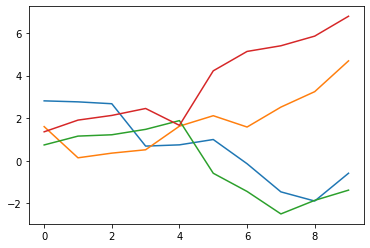

In [34]:
data=np.random.normal(1,1,100)
chn=chain(10, data, 10000)
plt.plot(chn)

In [9]:
np.random.normal((start_seed),1)

array([0.81019707, 1.1112108 , 2.86625275])

In [5]:
start_seed

array([1.49655587, 1.60244364, 2.28524767])